In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
from datetime import datetime

Importamos las librerias necesarias para webscrapping (Beautifulsoup y requests), modelaje y visualización(prophet, plot_plotly).

In [3]:
url = 'https://www.worldathletics.org/records/all-time-toplists/road-running/marathon/outdoor/men/senior'

In [4]:
#scrapping de varias paginas
max_pages = 50
current_page = 1

rank = []
mark = []
Competitor = []
DOB = []
Nat = []
Pos = []
Venue = []
Date = []
Results_Score = []

while current_page <= max_pages:
    print(current_page)
    current_url = f'{url}?page={current_page}'
    
    raw_html = requests.get(current_url)
    soup = BeautifulSoup(raw_html.text, 'html.parser')
    


    table = soup.find('table', {'class':'records-table'})
    for x in table.find_all('tr'):
        for y in x.find_all('td', {'data-th':'Rank'}):
            rank.append(y.text.strip())
    
    for x in table.find_all('tr'):
        for y in x.find_all('td', {'data-th':'Mark'}):
            mark.append(y.text.strip())
            
    for x in table.find_all('tr'):
        for y in x.find_all('td', {'data-th':'Competitor'}):
            Competitor.append(y.text.strip())
            
    for x in table.find_all('tr'):
        for y in x.find_all('td', {'data-th':'DOB'}):
            DOB.append(y.text.strip())
    
    for x in table.find_all('tr'):
        for y in x.find_all('td', {'data-th':'Nat'}):
            Nat.append(y.text.strip())
            
    for x in table.find_all('tr'):
        for y in x.find_all('td', {'data-th':'Pos'}):
            Pos.append(y.text.strip())
            
    for x in table.find_all('tr'):
        for y in x.find_all('td', {'data-th':'Venue'}):
            Venue.append(y.text.strip())
    
    for x in table.find_all('tr'):
        for y in x.find_all('td', {'data-th':'Date'}):
            Date.append(y.text.strip())
    
    for x in table.find_all('tr'):
        for y in x.find_all('td', {'data-th':'ResultScore'}):
            Results_Score.append(y.text.strip())
    
    df = pd.DataFrame({"Ranking":rank, "Marca":mark, "Atleta":Competitor, "Fecha Nacimiento":DOB, "Nacionalidad":Nat, "Posicion":Pos, "Lugar de la carrera":Venue, "Fecha":Date,"Puntuacion":Results_Score}) 


    current_page +=1
    
    
    
    



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [5]:
df.sort_values(by = 'Fecha')

Ranking    Marca                 Atleta Fecha Nacimiento Nacionalidad  \
4448    4449  2:14:35          Kim-Chang SON      11 APR 1944          PRK   
4250    4248  2:14:22           Marco MILANI      21 APR 1960          ITA   
485      486  2:07:45      Simretu ALEMAYEHU      18 OCT 1970          ETH   
4747    4734  2:14:52          Erastus MAINA             1983          KEN   
3282    3271  2:13:16       Paul Lopio LOMOL             1978          KEN   
...      ...      ...                    ...              ...          ...   
3458    3450  2:13:28          Mathew BUNGEI                           KEN   
4693    4682  2:14:49      Edwin Kemboi YANO      09 APR 1978          KEN   
3460    3450  2:13:28  Daniel KOMEN KIPCHERU                           KEN   
720      720  2:08:35        Geoffrey GIKUNI      11 MAR 1984          KEN   
1195    1191  2:09:52         Gilbert KIPTOO                           KEN   

     Posicion Lugar de la carrera        Fecha Puntuacion  
4448        3     Pyongyang (PRK)  01 APR 1976       1085  
4250        1          Roma (ITA)  01 APR 1991       1089  
485         1        Torino (ITA)  01 APR 2001       1198  
4747        6        Zürich (SUI)  01 APR 2007       1081  
3282        3        Zürich (SUI)  01 APR 2007       1107  
...       ...                 ...          ...        ...  
3458        7       Nairobi (KEN)  31 OCT 2010       1103  
4693       22     Frankfurt (GER)  31 OCT 2010       1082  
3460        9       Nairobi (KEN)  31 OCT 2010       1103  
720         1        Dublin (IRL)  31 OCT 2011       1184  
1195        2        Dublin (IRL)  31 OCT 2011       1162  

[4905 rows x 9 columns]

In [6]:
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Marca'] = pd.to_datetime(df['Marca'])

In [7]:
df.dtypes

Ranking                        object
Marca                  datetime64[ns]
Atleta                         object
Fecha Nacimiento               object
Nacionalidad                   object
Posicion                       object
Lugar de la carrera            object
Fecha                  datetime64[ns]
Puntuacion                     object
dtype: object

In [8]:
df['Marca'] = pd.to_datetime(df['Marca'])

In [9]:
df['Marca'].dt.second

0        9
1       41
2       53
3       48
4       55
        ..
4900     0
4901     0
4902     0
4903     0
4904     0
Name: Marca, Length: 4905, dtype: int64

In [10]:
df['Marca'] = df['Marca'].dt.hour*3600 + df['Marca'].dt.minute*60 + df['Marca'].dt.second

In [11]:
df.dtypes

Ranking                        object
Marca                           int64
Atleta                         object
Fecha Nacimiento               object
Nacionalidad                   object
Posicion                       object
Lugar de la carrera            object
Fecha                  datetime64[ns]
Puntuacion                     object
dtype: object

In [12]:
df['Año'] = df.Fecha.dt.year
df['Mes'] = df.Fecha.dt.month
df['Dia'] = df.Fecha.dt.day

In [13]:
df.Año.unique()

array([2022, 2019, 2014, 2021, 2020, 2016, 2011, 2017, 2008, 2018, 2012,
       2009, 2013, 2003, 2010, 2015, 2002, 1998, 2004, 1999, 2000, 2006,
       2007, 1988, 1995, 2005, 1985, 2001, 1997, 1986, 1992, 1990, 1994,
       1969, 1996, 1991, 1983, 1980, 1989, 1978, 1974, 1982, 1979, 1970,
       1981, 1976, 1984, 1993, 1975, 1987, 1972, 1968, 1973, 1967, 1977,
       1950, 1965, 1964, 1966, 1963])

In [14]:
new_df = df[['Marca','Fecha']]

In [15]:
new_df

Marca      Fecha
0      7269 2022-09-25
1      7301 2019-09-29
2      7313 2022-12-04
3      7368 2019-09-29
4      7375 2019-04-28
...     ...        ...
4900   8100 2011-05-29
4901   8100 2012-01-14
4902   8100 2015-02-08
4903   8100 2018-02-25
4904   8100 2021-12-05

[4905 rows x 2 columns]

In [16]:
new_df.to_csv('export.csv', index=False)

In [17]:
new_df.rename(columns={'Marca': 'y', 'Fecha': 'ds'}, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [18]:
m = Prophet()
m.fit(new_df)

13:41:25 - cmdstanpy - INFO - Chain [1] start processing
13:41:26 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
future = m.make_future_dataframe(periods=5475)
future.tail()

ds
6731 2037-12-09
6732 2037-12-10
6733 2037-12-11
6734 2037-12-12
6735 2037-12-13

In [20]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
6731 2037-12-09  7592.600679  7418.413745  7781.243606
6732 2037-12-10  7597.643928  7412.735580  7797.337329
6733 2037-12-11  7552.495325  7374.808554  7756.986189
6734 2037-12-12  7672.426038  7478.500879  7858.370933
6735 2037-12-13  7645.692558  7467.675630  7840.136901

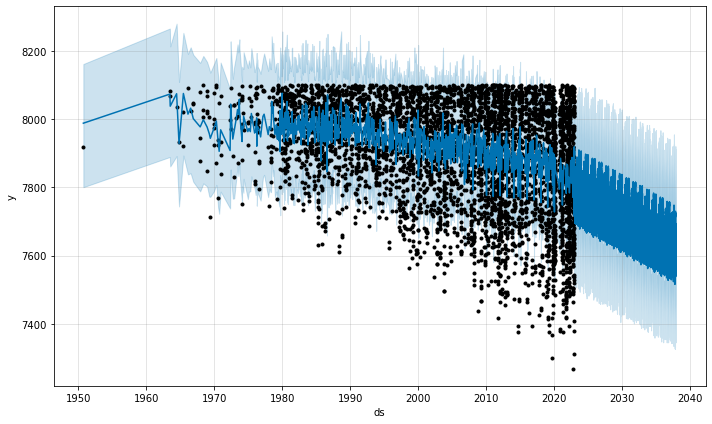

In [21]:
fig1 = m.plot(forecast)

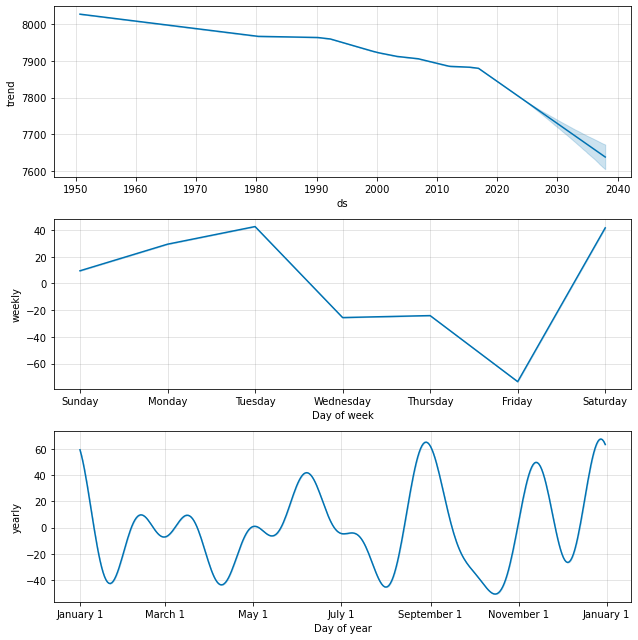

In [22]:
fig2 = m.plot_components(forecast)

In [23]:
plot_plotly(m, forecast)

Vemos que usando toda la base de datos el modelo nos ofrece un modelo con una predicción que no acaba de ser la deseada debido a que el modelo predice cuando la población general bajara de las 2h. Por ejemplo en el 2020, la predicción esta sobre los 7840 segundos cuando lo que realmente nos interesa para nuestro estudio son las mejores marcas de ese año debido a que esas marcas son las que de verdad salen de "la predicción" y son más probables que en un futuro rompan la barrera de las 2h.

Por ello, voy a enfocarme en hacer una selección de las 10 mejores marcas de cada año para obtener una mejor predicción de cuando se bajara de las 2h. Esto es debido a que queremos buscar la aproximación de cuando se rompera y no cuando la mayoria de los atletas de elite bajaran de 2h.

In [24]:
df['Fecha'] = pd.to_datetime(df['Fecha'])

In [25]:
new_df = pd.DataFrame(columns = df.columns)
for año in df.Año.unique():
    new_df = new_df.append(df[df.Año == año].sort_values(by= 'Marca')[:10])
new_df

Ranking Marca                   Atleta Fecha Nacimiento Nacionalidad  \
0          1  7269           Eliud KIPCHOGE      05 NOV 1984          KEN   
2          3  7313            Kelvin KIPTUM      02 DEC 1999          KEN   
8          8  7380      Gabriel Gerald GEAY      10 SEP 1996          TAN   
12        11  7393             Amos KIPRUTO      16 SEP 1992          KEN   
14        15  7409  Alexander Mutiso MUNYAO      10 SEP 1996          KEN   
...      ...   ...                      ...              ...          ...   
4006    4007  8045                Mike RYAN                           USA   
4019    4020  8046       Hidekuni HIROSHIMA      18 NOV 1937          JPN   
4733    4734  8092           Hirokazu OKABE      04 AUG 1941          JPN   
4336    4337  8068             Buddy EDELEN      22 SEP 1937          USA   
4580    4581  8083              Brian KILBY      26 FEB 1938          GBR   

     Posicion Lugar de la carrera      Fecha Puntuacion   Año Mes Dia  
0           1        Berlin (GER) 2022-09-25       1312  2022   9  25  
2           1      Valencia (ESP) 2022-12-04       1299  2022  12   4  
8           2      Valencia (ESP) 2022-12-04       1279  2022  12   4  
12          2         Tokyo (JPN) 2022-03-06       1275  2022   3   6  
14          3      Valencia (ESP) 2022-12-04       1271  2022  12   4  
...       ...                 ...        ...        ...   ...  ..  ..  
4006        1       Fukuoka (JPN) 1966-11-27       1093  1966  11  27  
4019        2       Fukuoka (JPN) 1966-11-27       1093  1966  11  27  
4733        2          Oita (JPN) 1966-02-13       1081  1966   2  13  
4336        1      Chiswick (GBR) 1963-06-15       1087  1963   6  15  
4580        1   Port Talbot (GBR) 1963-07-06       1083  1963   7   6  

[537 rows x 12 columns]

In [26]:
new_df2 = new_df[['Marca','Fecha']]

In [27]:
new_df2.rename(columns={'Marca': 'y', 'Fecha': 'ds'}, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
new_df2.dtypes

y             object
ds    datetime64[ns]
dtype: object

In [29]:
new_df2.rename(columns={'Marca': 'y', 'Fecha': 'ds'}, inplace=True)

In [30]:
m2= Prophet()
m2.fit(new_df2)

13:41:29 - cmdstanpy - INFO - Chain [1] start processing
13:41:29 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
#import plotly.express as px
#test = Prophet().fit(new_df2[['ds', 'y']])
#predict_test = test.make_future_dataframe(periods=3500)
#px.line(test.predict(predict_test).set_index('ds')['yhat'])

In [32]:
future2 = m2.make_future_dataframe(periods=3650)
future2.tail()

ds
3942 2032-11-27
3943 2032-11-28
3944 2032-11-29
3945 2032-11-30
3946 2032-12-01

In [33]:
forecast2 = m2.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
3942 2032-11-27  7351.326820  7248.439056  7447.627327
3943 2032-11-28  7352.905905  7251.682310  7456.952355
3944 2032-11-29  7313.103664  7210.266501  7410.222910
3945 2032-11-30  7354.557121  7252.617906  7458.081628
3946 2032-12-01  7247.153146  7143.200419  7343.281114

In [34]:
plot_plotly(m2, forecast2)

In [35]:
forecast2

ds        trend   yhat_lower   yhat_upper  trend_lower  \
0    1950-09-20  8038.646252  7858.769110  8015.830345  8038.646252   
1    1963-06-15  8006.136951  7964.411930  8126.580088  8006.136951   
2    1963-07-06  8005.990166  7921.415994  8090.506024  8005.990166   
3    1964-06-13  8003.592684  7961.309815  8118.689507  8003.592684   
4    1964-10-21  8002.684017  7870.878785  8024.916708  8002.684017   
...         ...          ...          ...          ...          ...   
3942 2032-11-27  7303.186182  7248.439056  7447.627327  7244.701231   
3943 2032-11-28  7303.156113  7251.682310  7456.952355  7244.650940   
3944 2032-11-29  7303.126043  7210.266501  7410.222910  7244.600648   
3945 2032-11-30  7303.095974  7252.617906  7458.081628  7244.550356   
3946 2032-12-01  7303.065905  7143.200419  7343.281114  7244.500064   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     8038.646252     -110.337353           -110.337353           -110.337353   
1     8006.136951       40.762216             40.762216             40.762216   
2     8005.990166        0.906716              0.906716              0.906716   
3     8003.592684       37.120039             37.120039             37.120039   
4     8002.684017      -57.674699            -57.674699            -57.674699   
...           ...             ...                   ...                   ...   
3942  7356.427423       48.140639             48.140639             48.140639   
3943  7356.419451       49.749792             49.749792             49.749792   
3944  7356.411478        9.977621              9.977621              9.977621   
3945  7356.403506       51.461147             51.461147             51.461147   
3946  7356.395534      -55.912760            -55.912760            -55.912760   

         weekly  weekly_lower  weekly_upper     yearly  yearly_lower  \
0    -44.657022    -44.657022    -44.657022 -65.680331    -65.680331   
1     29.104635     29.104635     29.104635  11.657582     11.657582   
2     29.104635     29.104635     29.104635 -28.197919    -28.197919   
3     29.104635     29.104635     29.104635   8.015404      8.015404   
4    -44.657022    -44.657022    -44.657022 -13.017677    -13.017677   
...         ...           ...           ...        ...           ...   
3942  29.104635     29.104635     29.104635  19.036004     19.036004   
3943  38.534900     38.534900     38.534900  11.214892     11.214892   
3944   6.501463      6.501463      6.501463   3.476158      3.476158   
3945  55.515178     55.515178     55.515178  -4.054031     -4.054031   
3946 -44.657022    -44.657022    -44.657022 -11.255738    -11.255738   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0       -65.680331                   0.0                         0.0   
1        11.657582                   0.0                         0.0   
2       -28.197919                   0.0                         0.0   
3         8.015404                   0.0                         0.0   
4       -13.017677                   0.0                         0.0   
...            ...                   ...                         ...   
3942     19.036004                   0.0                         0.0   
3943     11.214892                   0.0                         0.0   
3944      3.476158                   0.0                         0.0   
3945     -4.054031                   0.0                         0.0   
3946    -11.255738                   0.0                         0.0   

      multiplicative_terms_upper         yhat  
0                            0.0  7928.308899  
1                            0.0  8046.899167  
2                            0.0  8006.896882  
3                            0.0  8040.712723  
4                            0.0  7945.009318  
...                          ...          ...  
3942                         0.0  7351.326820  
3943                         0.0  7352.905905  
3944                     

In [36]:
# Loop through the forecasted values of yhat
for i, yhat in enumerate(forecast2['yhat']):
  # Check if the current value of yhat is the value we want
  if yhat < 7200:
    # If it is, print the corresponding date
    print(forecast['ds'][i])
    # And then break out of the loop
    break
    
    

2026-02-13 00:00:00


Evaluación del modelo

In [37]:
forecast2['yhat']

0       7928.308899
1       8046.899167
2       8006.896882
3       8040.712723
4       7945.009318
           ...     
3942    7351.326820
3943    7352.905905
3944    7313.103664
3945    7354.557121
3946    7247.153146
Name: yhat, Length: 3947, dtype: float64

In [38]:
forecast2['ds'].shape

(3947,)

In [39]:
new_df2['ds'].shape

(537,)

In [40]:
new_df2['ds']

0      2022-09-25
2      2022-12-04
8      2022-12-04
12     2022-03-06
14     2022-12-04
          ...    
4006   1966-11-27
4019   1966-11-27
4733   1966-02-13
4336   1963-06-15
4580   1963-07-06
Name: ds, Length: 537, dtype: datetime64[ns]

In [41]:
train = new_df2[:int(0.8*len(df))]
valid = new_df2[int(0.8*len(df)):]

In [42]:
model = Prophet()

In [43]:
model.fit(train)

13:41:30 - cmdstanpy - INFO - Chain [1] start processing
13:41:31 - cmdstanpy - INFO - Chain [1] done processing


In [44]:
future3 = model.make_future_dataframe(periods=0)

In [45]:
yhat3 = model.predict(future3)

In [46]:
yhat3

ds        trend   yhat_lower   yhat_upper  trend_lower  \
0   1950-09-20  8038.646252  7851.082359  8009.427875  8038.646252   
1   1963-06-15  8006.136951  7958.647429  8119.791810  8006.136951   
2   1963-07-06  8005.990166  7918.483803  8087.913601  8005.990166   
3   1964-06-13  8003.592684  7961.013296  8120.794390  8003.592684   
4   1964-10-21  8002.684017  7870.200372  8024.171773  8002.684017   
..         ...          ...          ...          ...          ...   
292 2022-04-24  7419.553946  7350.841548  7514.780948  7419.553946   
293 2022-09-25  7414.923290  7312.614048  7466.304939  7414.923290   
294 2022-10-09  7414.502322  7362.318353  7517.817957  7414.502322   
295 2022-10-16  7414.291838  7365.691434  7527.168981  7414.291838   
296 2022-12-04  7412.818447  7346.609638  7501.127474  7412.818447   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    8038.646252     -110.337353           -110.337353           -110.337353   
1    8006.136951       40.762216             40.762216             40.762216   
2    8005.990166        0.906716              0.906716              0.906716   
3    8003.592684       37.120039             37.120039             37.120039   
4    8002.684017      -57.674699            -57.674699            -57.674699   
..           ...             ...                   ...                   ...   
292  7419.553946       10.560888             10.560888             10.560888   
293  7414.923290      -28.246172            -28.246172            -28.246172   
294  7414.502322       29.990709             29.990709             29.990709   
295  7414.291838       32.687217             32.687217             32.687217   
296  7412.818447       11.417619             11.417619             11.417619   

        weekly  weekly_lower  weekly_upper     yearly  yearly_lower  \
0   -44.657022    -44.657022    -44.657022 -65.680331    -65.680331   
1    29.104635     29.104635     29.104635  11.657582     11.657582   
2    29.104635     29.104635     29.104635 -28.197919    -28.197919   
3    29.104635     29.104635     29.104635   8.015404      8.015404   
4   -44.657022    -44.657022    -44.657022 -13.017677    -13.017677   
..         ...           ...           ...        ...           ...   
292  38.534900     38.534900     38.534900 -27.974013    -27.974013   
293  38.534900     38.534900     38.534900 -66.781072    -66.781072   
294  38.534900     38.534900     38.534900  -8.544192     -8.544192   
295  38.534900     38.534900     38.534900  -5.847683     -5.847683   
296  38.534900     38.534900     38.534900 -27.117281    -27.117281   

     yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0      -65.680331                   0.0                         0.0   
1       11.657582                   0.0                         0.0   
2      -28.197919                   0.0                         0.0   
3        8.015404                   0.0                         0.0   
4      -13.017677                   0.0                         0.0   
..            ...                   ...                         ...   
292    -27.974013                   0.0                         0.0   
293    -66.781072                   0.0                         0.0   
294     -8.544192                   0.0                         0.0   
295     -5.847683                   0.0                         0.0   
296    -27.117281                   0.0                         0.0   

     multiplicative_terms_upper         yhat  
0                           0.0  7928.308899  
1                           0.0  8046.899167  
2                           0.0  8006.896882  
3                           0.0  8040.712723  
4                           0.0  7945.009318  
..                          ...          ...  
292                         0.0  7430.114833  
293                         0.0  7386.677118  
294                         0.0  7444.493030  
295                         0.0  7

In [47]:
new_df2 = new_df2.sort_values(['ds'])

In [48]:
new_df2

y         ds
2376  7919 1950-09-20
4336  8068 1963-06-15
4580  8083 1963-07-06
3857  8035 1964-06-13
2522  7932 1964-10-21
...    ...        ...
36    7464 2022-10-09
63    7489 2022-10-16
14    7409 2022-12-04
8     7380 2022-12-04
2     7313 2022-12-04

[537 rows x 2 columns]

In [49]:
df_cleaned = new_df2.drop_duplicates(subset='ds')

In [50]:
df_cleaned

y         ds
2376  7919 1950-09-20
4336  8068 1963-06-15
4580  8083 1963-07-06
3857  8035 1964-06-13
2522  7932 1964-10-21
...    ...        ...
60    7488 2022-04-24
0     7269 2022-09-25
36    7464 2022-10-09
63    7489 2022-10-16
14    7409 2022-12-04

[297 rows x 2 columns]

In [51]:
r2 = r2_score(df_cleaned['y'], yhat3['yhat'])
mse = mean_squared_error(df_cleaned['y'],yhat3['yhat'], squared = True)
mae = (df_cleaned['y'] - yhat3['yhat']).abs().mean()

In [52]:
print("R2 Score: ", r2)
print("MAE: ", mae)


R2 Score:  0.8650398409824821
MAE:  291.37362068043217
